Train Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None

Test Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None

Train Dataset Head:
  

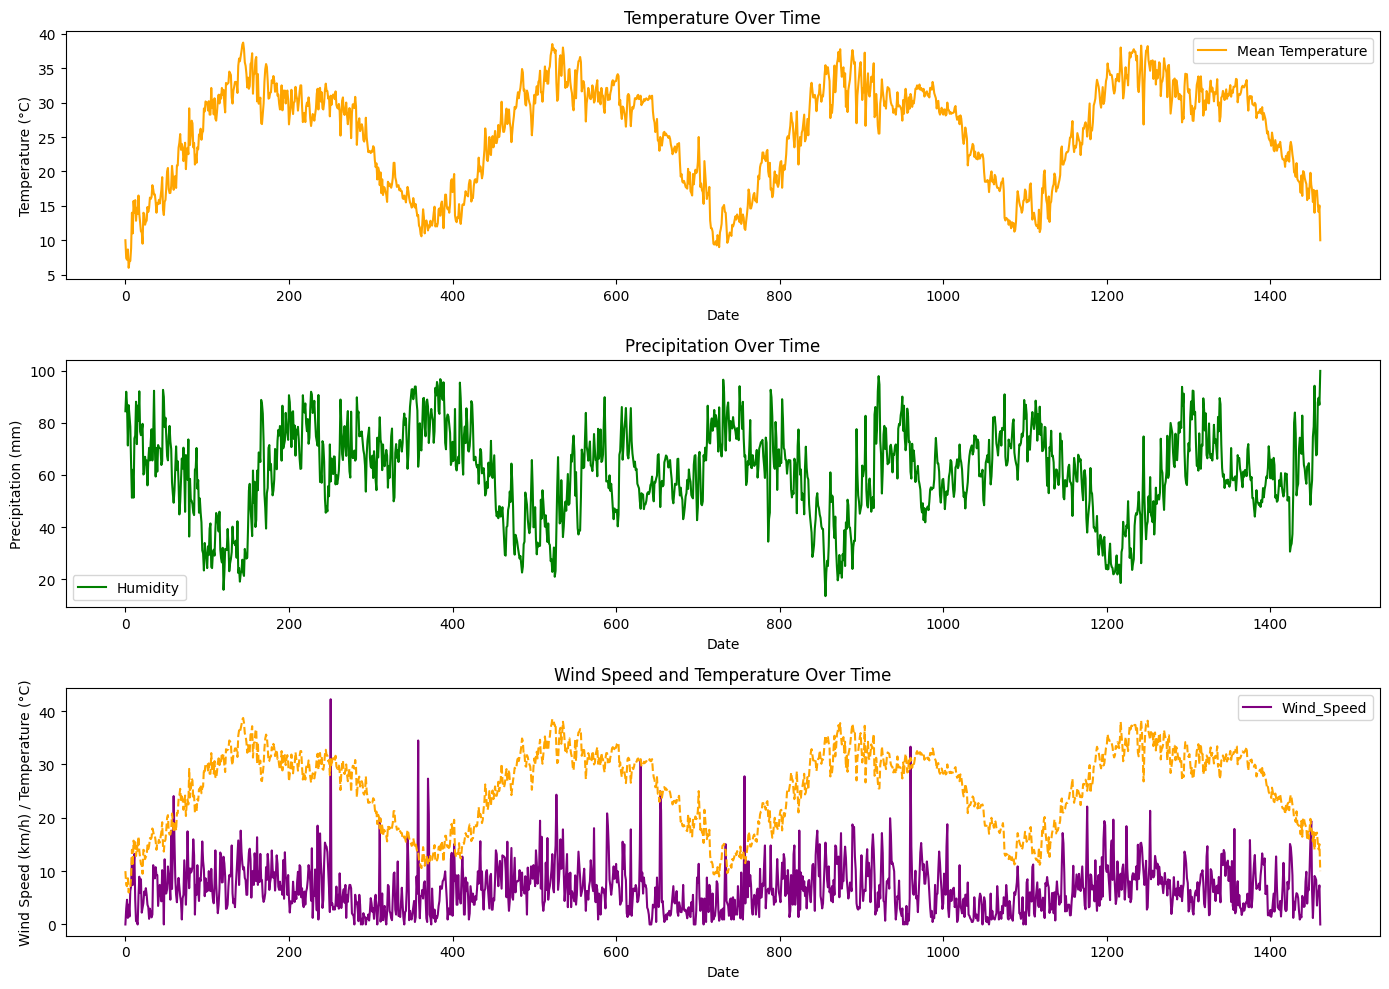

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
train_path = "/content/DailyDelhiClimateTrain.csv"
test_path = "/content/DailyDelhiClimateTest.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display dataset information
print("Train Dataset Structure:")
print(train_df.info())
print("\nTest Dataset Structure:")
print(test_df.info())
print("\nTrain Dataset Head:")
print(train_df.head())
print("\nTest Dataset Head:")
print(test_df.head())

# Handle missing values (if any)
print("\nMissing Values in Train Dataset:")
print(train_df.isnull().sum())
print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())

# Fill missing values with the mean of numeric columns (excluding 'date')
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())
test_df[numeric_columns] = test_df[numeric_columns].fillna(test_df[numeric_columns].mean())

# Display key statistics
print("\nKey Statistics for Train Dataset:")
print(train_df.describe())
print("\nKey Statistics for Test Dataset:")
print(test_df.describe())

# Create visualizations
plt.figure(figsize=(14, 10))

# Subplot for Temperature
plt.subplot(3, 1, 1)
plt.plot(train_df.index, train_df['meantemp'], label='Mean Temperature', color='orange')
# Check for and plot other temperature columns dynamically
temp_cols = ['maxtemp', 'maximum temperature', 'mintemp', 'minimum temperature']
for col in temp_cols:
    if col in train_df.columns:
        if 'max' in col.lower():
            plt.plot(train_df.index, train_df[col], label=col.title(), color='red')
        elif 'min' in col.lower():
            plt.plot(train_df.index, train_df[col], label=col.title(), color='blue')
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()

# Subplot for Precipitation
plt.subplot(3, 1, 2)
# Check for and plot precipitation columns dynamically
precip_cols = ['humidity', 'precipitation']
for col in precip_cols:
    if col in train_df.columns:
        plt.plot(train_df.index, train_df[col], label=col.title(), color='green')
        plt.title("Precipitation Over Time")
        plt.xlabel("Date")
        plt.ylabel("Precipitation (mm)")  # Adjust units if needed
        plt.legend()
        break  # Exit loop if a precipitation column is found

# Subplot for Wind Speed vs Temperature
plt.subplot(3, 1, 3)
# Check for and plot wind speed columns dynamically
wind_cols = ['wind_speed', 'windspeed']
for col in wind_cols:
    if col in train_df.columns:
        plt.plot(train_df.index, train_df[col], label=col.title(), color='purple')
        plt.title("Wind Speed and Temperature Over Time")
        plt.xlabel("Date")
        plt.ylabel("Wind Speed (km/h) / Temperature (°C)")
        plt.legend()
        break  # Exit loop if a wind speed column is found
plt.plot(train_df.index, train_df['meantemp'], label='Mean Temperature', color='orange', linestyle='--')

plt.tight_layout()
plt.show()

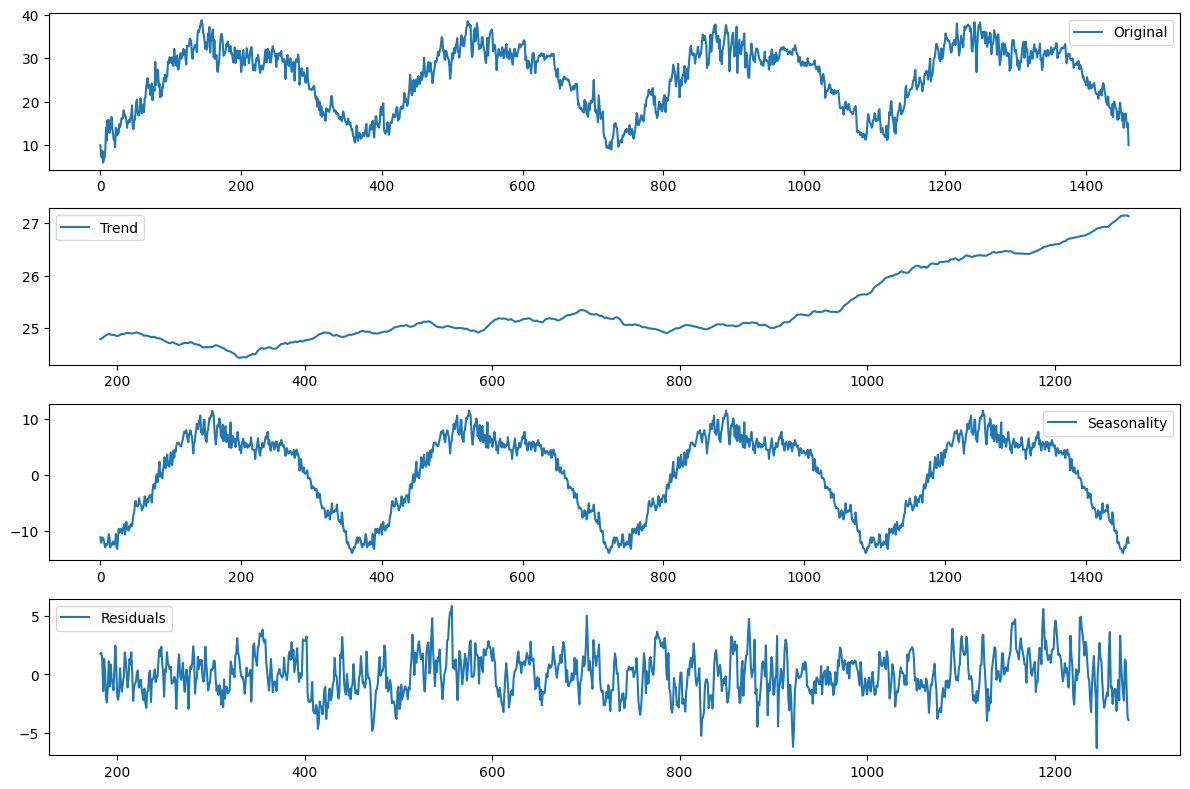

In [ ]:
import statsmodels.api as sm

# Assuming your DataFrame is named 'train_df' and the temperature column is 'meantemp'
ts_meantemp = train_df['meantemp']

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(ts_meantemp, model='additive', period=365)  # Assuming yearly seasonality

# Access the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ts_meantemp, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming your datasets are named 'train_df' and 'test_df'
# Select the variable for forecasting (e.g., 'meantemp')
variable = 'meantemp'

# Extract the time series data for the selected variable
train_data = train_df[variable]
test_data = test_df[variable]

# Fit the STL model to the training data
stl = STL(train_data, seasonal=7, period=365)  # Adjust seasonal and period parameters as needed
result = stl.fit()

# Get the trend component
trend = result.trend

# Forecast using the trend component for the length of the test data
forecast = trend[-len(test_data):]

# Calculate MAE and RMSE
mae = mean_absolute_error(test_data, forecast)
# Calculate MSE and then take the square root to get RMSE
rmse = mean_squared_error(test_data, forecast) ** 0.5  # Calculate RMSE manually

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 7.552305317290533
Root Mean Squared Error (RMSE): 8.701148638741852


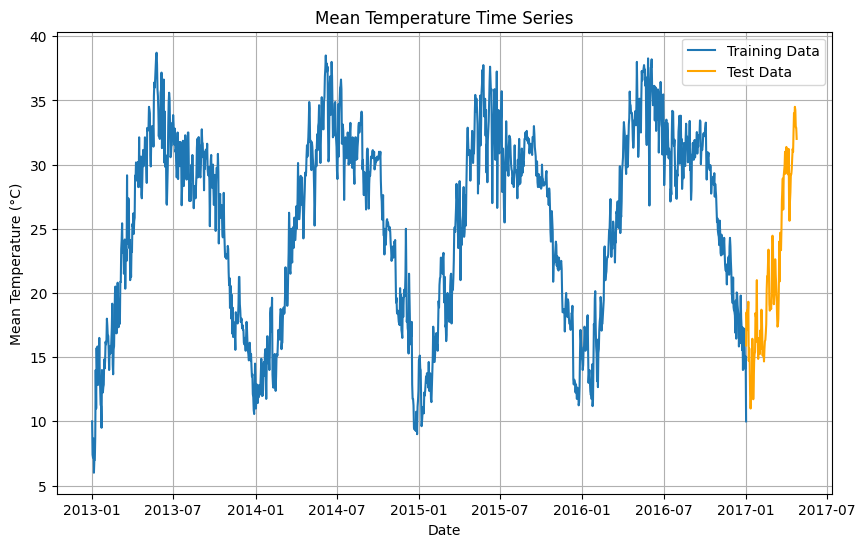

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -2764.775
Date:                Thu, 16 Jan 2025   AIC                           5545.551
Time:                        09:24:07   BIC                           5587.846
Sample:                    01-01-2013   HQIC                          5561.328
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1991      0.545     -0.365      0.715      -1.268       0.870
ar.L2          0.4022      0.331      1.214      0.225      -0.247       1.052
ar.L3         -0.0749      0.037     -2.031      0.0

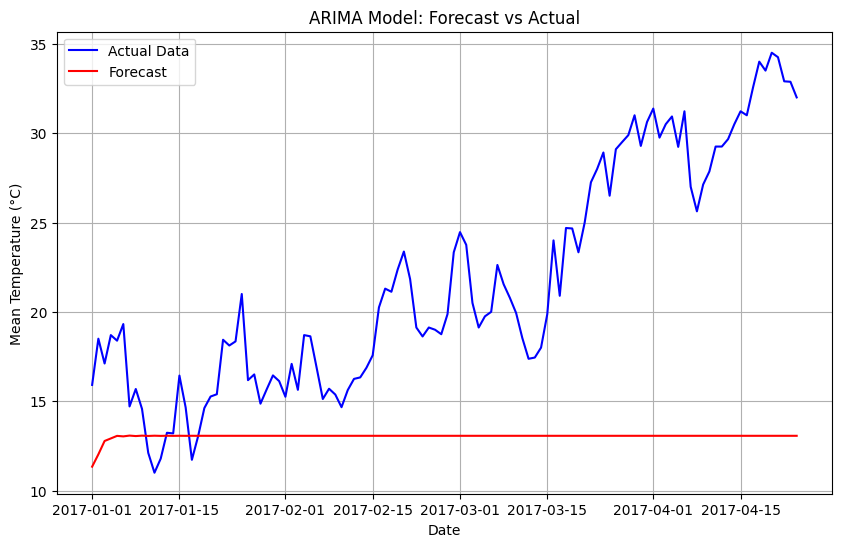

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
train_path = '/content/DailyDelhiClimateTrain.csv'
test_path = '/content/DailyDelhiClimateTest.csv'

train_data = pd.read_csv(train_path, parse_dates=['date'], index_col='date')
test_data = pd.read_csv(test_path, parse_dates=['date'], index_col='date')

# Select the column to forecast (e.g., 'meantemp')
train_series = train_data['meantemp']
test_series = test_data['meantemp']

# Plot the training data
plt.figure(figsize=(10, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series, label='Test Data', color='orange')
plt.title('Mean Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Fit ARIMA model (p, d, q)
# You can adjust p, d, q after testing for stationarity and ACF/PACF analysis
model = ARIMA(train_series, order=(5, 1, 2))  # Example order (p, d, q)
fitted_model = model.fit()

# Summary of the model
print(fitted_model.summary())

# Forecast the test set
forecast = fitted_model.forecast(steps=len(test_series))

# Evaluate the model
mae = mean_absolute_error(test_series, forecast)
rmse = np.sqrt(mean_squared_error(test_series, forecast))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(test_series, label='Actual Data', color='blue')
plt.plot(test_series.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model: Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()